In [1]:
import numpy as np
from enum import IntEnum
from matplotlib import pyplot as plt
lambdas = np.load('lambdas.npy')

class OrderbookEventTypes(IntEnum):
    Limit=1
    PartialCancel=2
    Deletion=3
    ExecutionOfVisibleOrder=4
    ExecutionOfHiddenOrder=5
    TradingHalt=7

class OrderbookIndexes(IntEnum):
    Bid=0
    Ask=1

DEPTH = 3
ORDER_TYPES = 3
PRICE_TICK = 100
NORMALIZED_QUEUE_MAX = 50

0.257426013678744


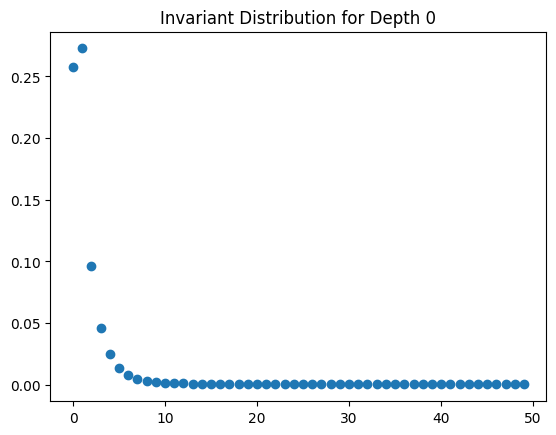

0.10334044441123758


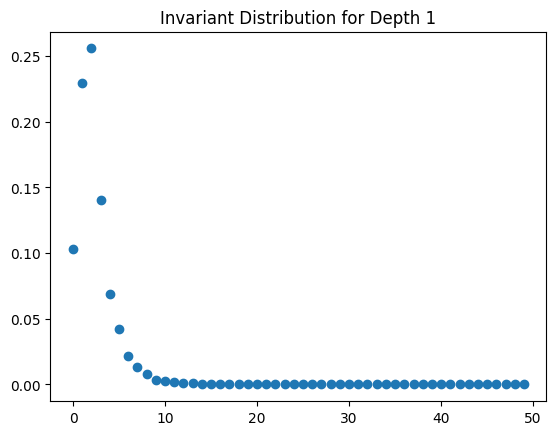

2.7591925058465708e-05


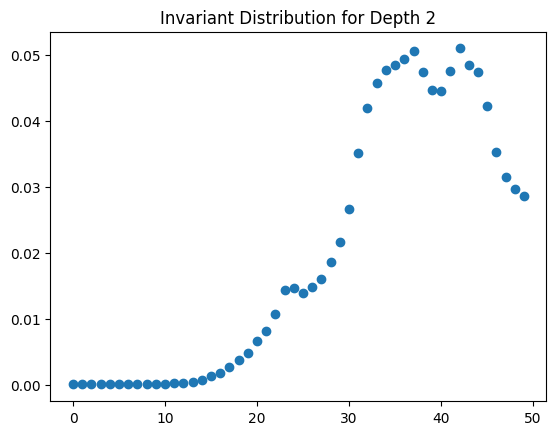

In [2]:
# Invarient Distibutions
def ArrivalDepartureRatio(depth, n):
    limitBid = lambdas[depth][OrderbookIndexes.Bid][0][n]
    cancelBid = lambdas[depth][OrderbookIndexes.Bid][1][n + 1]
    marketBid = lambdas[depth][OrderbookIndexes.Bid][2][n + 1]

    return (limitBid) / (cancelBid + marketBid)

def InvariantDistribution(depth, n):
    product = 1
    
    for j in range(0, n):
        ratio = ArrivalDepartureRatio(depth, j)
        product *= (ratio if ratio != 0 else 1) 

    return product

for depth in range(0, DEPTH):
    sum = 0
    for n in range(0, NORMALIZED_QUEUE_MAX):
        sum += InvariantDistribution(depth, n)

    initial_distribution = 1 / (1 + sum)

    print(initial_distribution)

    x_vals = np.linspace(0, NORMALIZED_QUEUE_MAX - 1, NORMALIZED_QUEUE_MAX)
    y_vals = [initial_distribution * InvariantDistribution(depth, int(x)) for x in x_vals]

    plt.scatter(x_vals, y_vals)
    plt.title(f'Invariant Distribution for Depth {depth}')
    plt.show()